In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings

warnings.filterwarnings('ignore', category = RuntimeWarning)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-to-model-farmers-credit-worthiness/Access to finance.xlsx
/kaggle/input/dataset-to-model-farmers-credit-worthiness/FAOSTAT_data_en_5-13-2025.xlsx
/kaggle/input/dataset-to-model-farmers-credit-worthiness/Merged NASA Power_Regional.xlsx


In [2]:
finance_data = pd.read_excel('/kaggle/input/dataset-to-model-farmers-credit-worthiness/Access to finance.xlsx')
crop_livestock = pd.read_excel('/kaggle/input/dataset-to-model-farmers-credit-worthiness/FAOSTAT_data_en_5-13-2025.xlsx')
climate_data = pd.read_excel('/kaggle/input/dataset-to-model-farmers-credit-worthiness/Merged NASA Power_Regional.xlsx')

In [3]:
finance_data.head()

,Weight,Gender,Age,Education,Household Income,Employment Status,Location,Bank Account,Mobile Money Account,fin1_1a,...,Receive_Transfers,Receive_Pension,Receive_Payment for Sales of Agric Goods,Pay_Utilities,Remittances,Mobile Owner,Internet Access,Any Digital Payment,Merchant Pay_Dig,Year
0,0.976499,Female,25,Primary,Average,Employed,Rural,No,No,NaN,...,Did Not Received Payment,Did Not Received Payment,Received Payment Using Other Methods,Did Not Make Payment,did not send/receive,No,No,No,No,2021
1,0.227251,Male,25,Secondary,Rich,Employed,Urban,Yes,No,2.0,...,Did Not Received Payment,Did Not Received Payment,Did Not Received Payment,Made Payment in Cash Only,sent/received through an account,Yes,No,Yes,Yes,2021
2,0.540520,Female,18,Secondary,Very Poor,Employed,Rural,No,No,NaN,...,Did Not Received Payment,Did Not Received Payment,Received Payment in Cash Only,Did Not Make Payment,sent/received through an account,Yes,Yes,No,No,2021
3,0.684295,Male,23,Secondary,Rich,Employed,Rural,No,No,NaN,...,Did Not Received Payment,Did Not Received Payment,Did Not Received Payment,Did Not Make Payment,did not send/receive,Yes,No,No,No,2021
4,0.692466,Male,25,Secondary,Very Rich,Unemployed,Rural,No,No,NaN,...,Did Not Received Payment,Did Not Received Payment,Did Not Received Payment,Did Not Make Payment,did not send/receive,Yes,Yes,No,No,2021


In [4]:
crop_livestock.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,566,Nigeria,5111,Stocks,2132,Asses,2023,2023,An,1357245.00,I,Imputed value,NaN
1,QCL,Crops and livestock products,566,Nigeria,5312,Area harvested,1312,Bananas,2023,2023,ha,566568.00,I,Imputed value,NaN
2,QCL,Crops and livestock products,566,Nigeria,5412,Yield,1312,Bananas,2023,2023,kg/ha,12898.90,E,Estimated value,NaN
3,QCL,Crops and livestock products,566,Nigeria,5510,Production,1312,Bananas,2023,2023,t,7308103.18,E,Estimated value,NaN
4,QCL,Crops and livestock products,566,Nigeria,5114,Stocks,2196,Bees,2023,2023,No,NaN,M,"Missing value (data cannot exist, not applicable)",NaN


In [5]:
# Replace inf with NaN, then drop or fill
finance_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Optionally drop NaNs
# df.dropna(inplace=True)

# Or fill them (example: with 0)
# df.fillna(0, inplace=True)


In [6]:
climate_data.head()

,PARAMETER,YEAR,LAT,LON,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL AVG
0,PRECTOTCORR,2001,10.0,10.000,0.0,0.0,0.01,1.59,2.68,2.43,4.66,4.20,3.54,0.36,0.0,0.0,1.62
1,PRECTOTCORR,2001,10.0,10.625,0.0,0.0,0.01,1.70,3.83,3.55,5.23,5.71,5.42,0.86,0.0,0.0,2.19
2,PRECTOTCORR,2001,10.0,11.250,0.0,0.0,0.00,1.83,4.73,5.13,5.45,7.00,6.65,1.18,0.0,0.0,2.66
3,PRECTOTCORR,2001,10.0,11.875,0.0,0.0,0.00,1.83,4.79,5.42,5.37,7.12,6.68,1.18,0.0,0.0,2.70
4,PRECTOTCORR,2001,10.0,12.500,0.0,0.0,0.01,2.50,4.45,7.54,7.52,7.91,8.06,1.68,0.0,0.0,3.31


In [7]:
finance_data.describe()

,Weight,Age,fin1_1a,fin6,fin10b,Year
count,307.000000,307.000000,160.000000,161.000000,161.000000,307.0
mean,0.994188,21.736156,1.725000,1.360248,1.229814,2021.0
std,0.851315,2.435863,0.447916,0.506863,0.464333,0.0
min,0.223275,18.000000,1.000000,1.000000,1.000000,2021.0
25%,0.405306,20.000000,1.000000,1.000000,1.000000,2021.0
50%,0.696283,21.000000,2.000000,1.000000,1.000000,2021.0
75%,1.268354,24.000000,2.000000,2.000000,1.000000,2021.0
max,3.691327,25.000000,2.000000,3.000000,3.000000,2021.0


### Exploratory Data Analysism

In [8]:
finance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 43 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Weight                                      307 non-null    float64
 1   Gender                                      307 non-null    object 
 2   Age                                         307 non-null    int64  
 3   Education                                   307 non-null    object 
 4   Household Income                            307 non-null    object 
 5   Employment Status                           307 non-null    object 
 6   Location                                    307 non-null    object 
 7   Bank Account                                307 non-null    object 
 8   Mobile Money Account                        307 non-null    object 
 9   fin1_1a                                     160 non-null    float64
 10  Govt Assisted 

In [9]:
finance_data.isnull().sum()

Weight                                          0
Gender                                          0
Age                                             0
Education                                       0
Household Income                                0
Employment Status                               0
Location                                        0
Bank Account                                    0
Mobile Money Account                            0
fin1_1a                                       147
Govt Assisted                                   0
DebitCard Ownership                             0
DebitCard Usage                                 0
Internet Banking                                0
fin6                                          146
Account Withdraw                                0
finYes0a                                        0
fin10b                                        146
Account Literacy                                0
No Account- Distance                            0


In [10]:
finance_data[finance_data['Account Literacy'] == 'Not Stated'].shape[0]

166

In [11]:
finance_data['Account Literacy'].value_counts()

Account Literacy
Not Stated    166
Yes            76
No             54
Unknown        11
Name: count, dtype: int64

In [12]:
finance_data.replace(['Not Stated', 'Unknown'], 'Missing', inplace=True)


In [13]:
finance_data['Govt Assisted'].value_counts()

Govt Assisted
No         149
Missing    148
Yes         10
Name: count, dtype: int64

In [14]:
finance_data.replace('Did Not Received Payment', 'No', inplace=True)

In [15]:
finance_data['Receive_Transfers'].value_counts()

Receive_Transfers
No                                  301
Received Payment in Cash Only         3
Received Payment into An Account      2
Don't Know                            1
Name: count, dtype: int64

In [16]:
finance_data['Receive_Pension'].value_counts()

Receive_Pension
No                                      305
Received Payment into An Account          1
Received Payment Using Other Methods      1
Name: count, dtype: int64

In [17]:
finance_data.replace('Received Payment into An Account', 'Transfer', inplace=True)
finance_data.replace('Received Payment in Cash Only', 'Cash', inplace=True)
finance_data.replace('Received Payment Using Other Methods', 'Others', inplace=True)
finance_data.replace('Don\'t Know', 'Transfer', inplace=True)



In [18]:
finance_data['Receive_Pension'].value_counts()

Receive_Pension
No          305
Transfer      1
Others        1
Name: count, dtype: int64

In [19]:
finance_data['Pay_Utilities'].value_counts()

Pay_Utilities
Did Not Make Payment                217
Made Payment in Cash Only            60
Made Payment from An Account         27
Missing                               2
Made Payment Using Other Methods      1
Name: count, dtype: int64

In [20]:
finance_data.replace(['Did Not Make Payment', 'Made Payment in Cash Only', 'Made Payment from An Account', 'Made Payment Using Other Methods'], ['No', 'Cash', 'Transfer', 'Others'], inplace=True)

In [21]:
finance_data['Pay_Utilities'].value_counts()

Pay_Utilities
No          217
Cash         60
Transfer     27
Missing       2
Others        1
Name: count, dtype: int64

In [22]:
finance_data

,Weight,Gender,Age,Education,Household Income,Employment Status,Location,Bank Account,Mobile Money Account,fin1_1a,...,Receive_Transfers,Receive_Pension,Receive_Payment for Sales of Agric Goods,Pay_Utilities,Remittances,Mobile Owner,Internet Access,Any Digital Payment,Merchant Pay_Dig,Year
0,0.976499,Female,25,Primary,Average,Employed,Rural,No,No,NaN,...,No,No,Others,No,did not send/receive,No,No,No,No,2021
1,0.227251,Male,25,Secondary,Rich,Employed,Urban,Yes,No,2.0,...,No,No,No,Cash,sent/received through an account,Yes,No,Yes,Yes,2021
2,0.540520,Female,18,Secondary,Very Poor,Employed,Rural,No,No,NaN,...,No,No,Cash,No,sent/received through an account,Yes,Yes,No,No,2021
3,0.684295,Male,23,Secondary,Rich,Employed,Rural,No,No,NaN,...,No,No,No,No,did not send/receive,Yes,No,No,No,2021
4,0.692466,Male,25,Secondary,Very Rich,Unemployed,Rural,No,No,NaN,...,No,No,No,No,did not send/receive,Yes,Yes,No,No,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.282188,Male,23,Secondary,Very Rich,Employed,Urban,Yes,Yes,1.0,...,No,No,No,Transfer,did not send/receive,Yes,Yes,Yes,Yes,2021
303,1.622286,Male,22,Secondary,Very Poor,Unemployed,Urban,No,No,NaN,...,No,No,No,No,did not send/receive,Yes,Yes,No,No,2021
304,0.812816,Female,20,Secondary,Very Poor,Employed,Rural,Yes,No,2.0,...,No,No,No,No,did not send/receive,Yes,No,No,No,2021
305,0.558785,Male,20,Secondary,Very Rich,Employed,Rural,Yes,No,2.0,...,No,No,No,No,sent/received through an account,Yes,Yes,Yes,No,2021


In [23]:
finance_data['Any Digital Payment'].value_counts()

Any Digital Payment
No     173
Yes    134
Name: count, dtype: int64

In [24]:
print((finance_data == 'Missing').sum())

Weight                                          0
Gender                                          0
Age                                             0
Education                                       0
Household Income                                0
Employment Status                               0
Location                                        0
Bank Account                                    0
Mobile Money Account                            0
fin1_1a                                         0
Govt Assisted                                 148
DebitCard Ownership                             1
DebitCard Usage                               171
Internet Banking                              149
fin6                                            0
Account Withdraw                              147
finYes0a                                      174
fin10b                                          0
Account Literacy                              177
No Account- Distance                          161


### Dropping columnn Weight

In [25]:
finance_data.drop(columns='Weight', inplace=True)

In [26]:
finance_data.drop(columns=['fin1_1a', 'fin6', 'finYes0a','fin10b'], inplace=True)

In [27]:
finance_data['Education'] = finance_data['Education'].replace('Transfer', 'Missing')

### Unique values per columnm

In [28]:
for col in finance_data.columns:
    print (f"Column: {col}")
    print (finance_data[col].unique())
    print ('---')
    

Column: Gender
['Female' 'Male']
---
Column: Age
[25 18 23 20 22 21 19 24]
---
Column: Education
['Primary' 'Secondary' 'Tertiary' 'Missing']
---
Column: Household Income
['Average' 'Rich' 'Very Poor' 'Very Rich' 'Poor']
---
Column: Employment Status
['Employed' 'Unemployed']
---
Column: Location
['Rural' 'Urban']
---
Column: Bank Account
['No' 'Yes']
---
Column: Mobile Money Account
['No' 'Yes']
---
Column: Govt Assisted
['Missing' 'No' 'Yes']
---
Column: DebitCard Ownership
['No' 'Yes' 'Missing']
---
Column: DebitCard Usage
['Missing' 'Yes' 'No' 3]
---
Column: Internet Banking
['Missing' 'No' 'Yes']
---
Column: Account Withdraw
['Missing' 'Yes' 'No']
---
Column: Account Literacy
['No' 'Missing' 'Yes']
---
Column: No Account- Distance
['Yes' 'Missing' 'No' 3]
---
Column: No Account- Expensive
['Yes' 'Missing' 'No' 3]
---
Column: No Account- Lack of Documentation
['Yes' 'Missing' 'No' 3]
---
Column: No Account- Lacks Trust
['Yes' 'Missing' 'No']
---
Column: No Account- Religious Reason

In [29]:
cols_with_3 = ['DebitCard Usage', 'No Account- Distance', 'No Account- Expensive',
               'No Account- Lack of Documentation']
for col in cols_with_3:
    finance_data[col] = finance_data[col].replace(3, 'Missing')


In [30]:
finance_data.drop(columns='Year', inplace=True)

In [31]:
for col in finance_data.columns:
    print (f"Column: {col}")
    print (finance_data[col].unique())
    print ('---')

Column: Gender
['Female' 'Male']
---
Column: Age
[25 18 23 20 22 21 19 24]
---
Column: Education
['Primary' 'Secondary' 'Tertiary' 'Missing']
---
Column: Household Income
['Average' 'Rich' 'Very Poor' 'Very Rich' 'Poor']
---
Column: Employment Status
['Employed' 'Unemployed']
---
Column: Location
['Rural' 'Urban']
---
Column: Bank Account
['No' 'Yes']
---
Column: Mobile Money Account
['No' 'Yes']
---
Column: Govt Assisted
['Missing' 'No' 'Yes']
---
Column: DebitCard Ownership
['No' 'Yes' 'Missing']
---
Column: DebitCard Usage
['Missing' 'Yes' 'No']
---
Column: Internet Banking
['Missing' 'No' 'Yes']
---
Column: Account Withdraw
['Missing' 'Yes' 'No']
---
Column: Account Literacy
['No' 'Missing' 'Yes']
---
Column: No Account- Distance
['Yes' 'Missing' 'No']
---
Column: No Account- Expensive
['Yes' 'Missing' 'No']
---
Column: No Account- Lack of Documentation
['Yes' 'Missing' 'No']
---
Column: No Account- Lacks Trust
['Yes' 'Missing' 'No']
---
Column: No Account- Religious Reasons
['No' 

### Checking Missing Values

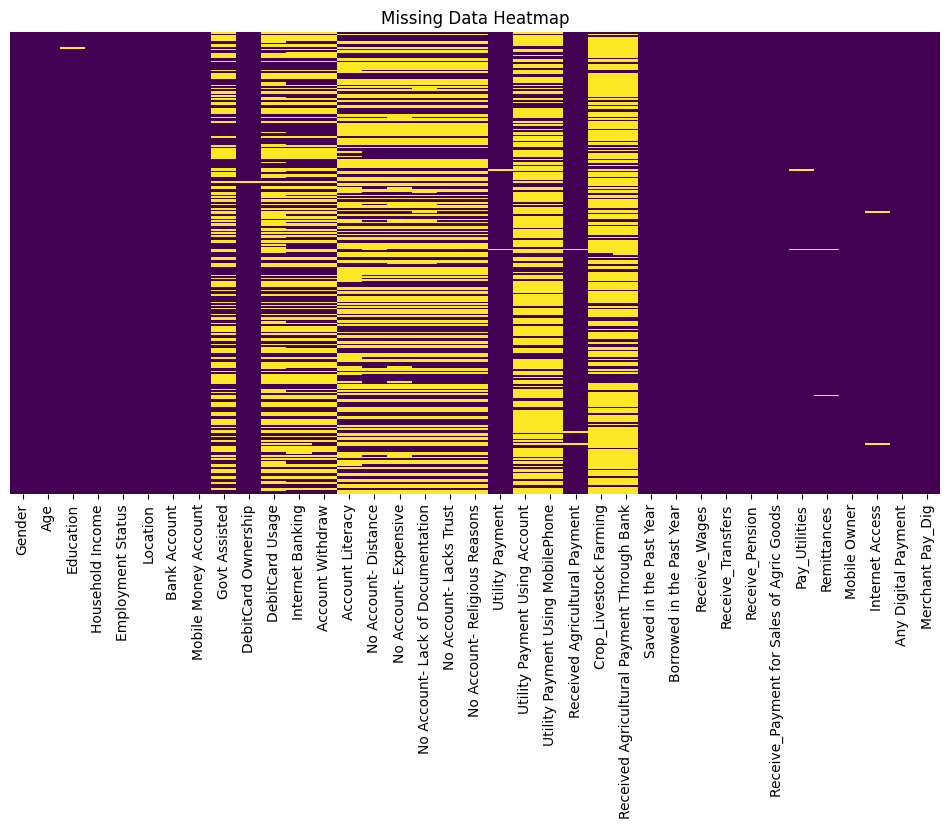

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(finance_data.isnull() | (finance_data == 'Missing'), 
            cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


### Age Distribution

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


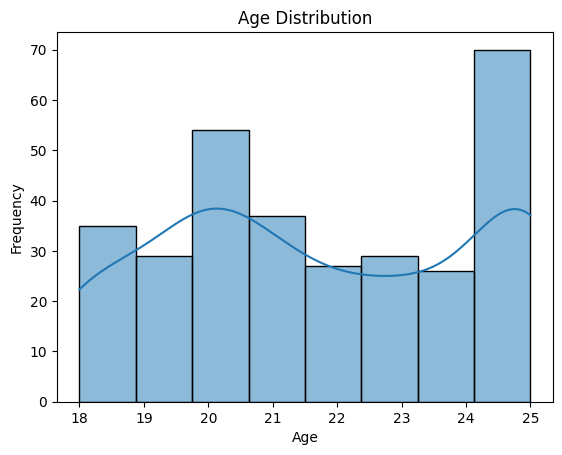

In [33]:
sns.histplot(finance_data['Age'], bins=8, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### Plot for key Categorical Values

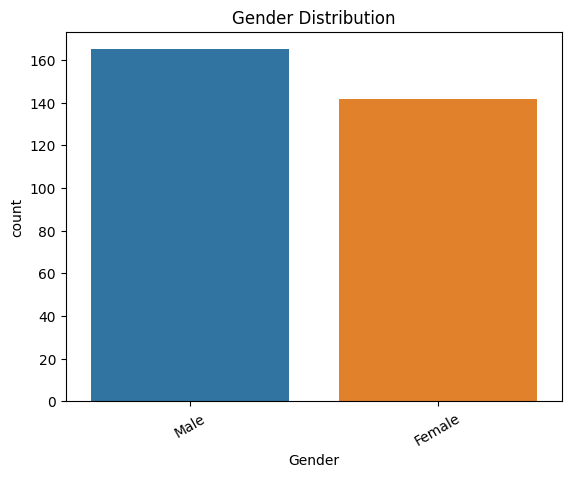

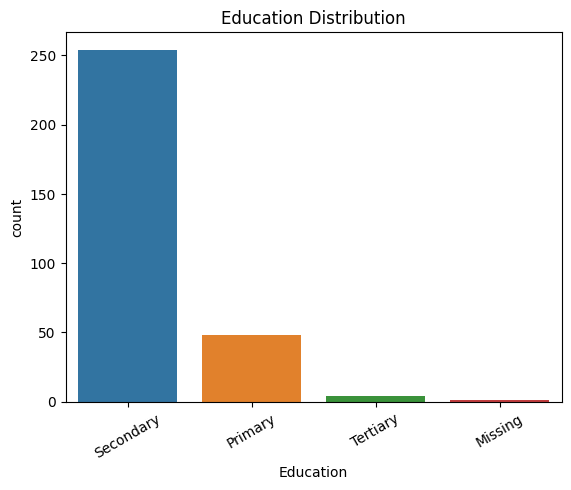

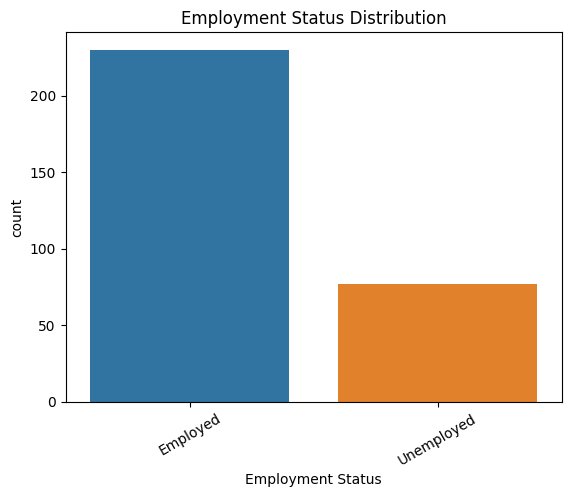

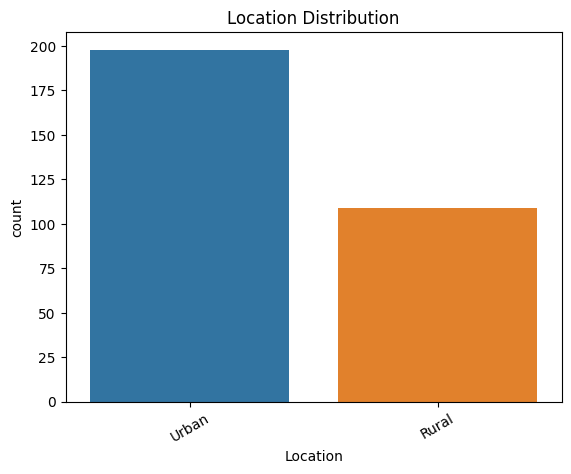

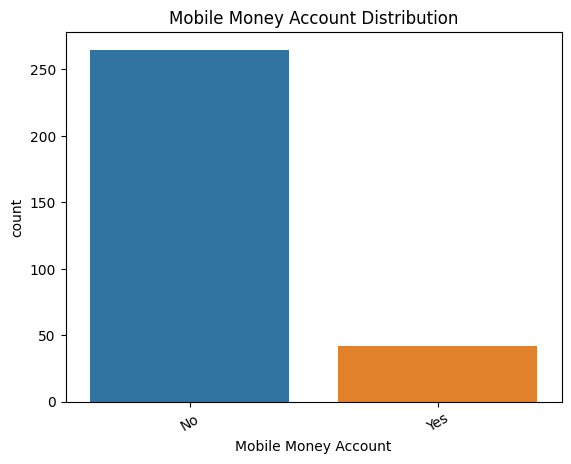

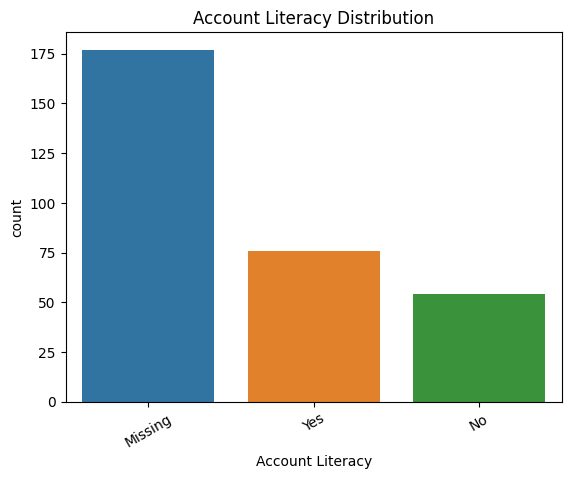

In [34]:
categorical_cols = ['Gender', 'Education', 'Employment Status', 
                    'Location', 'Mobile Money Account', 'Account Literacy']

for col in categorical_cols:
    sns.countplot(data=finance_data, x=col, order=finance_data[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=30)
    plt.show()


## Cleaning and Preparing Agricultural production dataset

In [35]:
crop_livestock

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,566,Nigeria,5111,Stocks,2132,Asses,2023,2023,An,1357245.00,I,Imputed value,NaN
1,QCL,Crops and livestock products,566,Nigeria,5312,Area harvested,1312,Bananas,2023,2023,ha,566568.00,I,Imputed value,NaN
2,QCL,Crops and livestock products,566,Nigeria,5412,Yield,1312,Bananas,2023,2023,kg/ha,12898.90,E,Estimated value,NaN
3,QCL,Crops and livestock products,566,Nigeria,5510,Production,1312,Bananas,2023,2023,t,7308103.18,E,Estimated value,NaN
4,QCL,Crops and livestock products,566,Nigeria,5114,Stocks,2196,Bees,2023,2023,No,NaN,M,"Missing value (data cannot exist, not applicable)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13630,QCL,Crops and livestock products,566,Nigeria,5412,Yield,111,Wheat,1961,1961,kg/ha,1777.80,A,Official figure,NaN
13631,QCL,Crops and livestock products,566,Nigeria,5510,Production,111,Wheat,1961,1961,t,16000.00,A,Official figure,NaN
13632,QCL,Crops and livestock products,566,Nigeria,5312,Area harvested,1540,Yams,1961,1961,ha,450000.00,E,Estimated value,NaN
13633,QCL,Crops and livestock products,566,Nigeria,5412,Yield,1540,Yams,1961,1961,kg/ha,7777.80,E,Estimated value,NaN


In [36]:
crop_livestock.drop(columns=['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 
                             'Element Code', 'Item Code (CPC)', 'Year Code', 'Flag', 'Flag Description', 'Note'], inplace=True)

In [37]:
crop_livestock

,Element,Item,Year,Unit,Value
0,Stocks,Asses,2023,An,1357245.00
1,Area harvested,Bananas,2023,ha,566568.00
2,Yield,Bananas,2023,kg/ha,12898.90
3,Production,Bananas,2023,t,7308103.18
4,Stocks,Bees,2023,No,NaN
...,...,...,...,...,...
13630,Yield,Wheat,1961,kg/ha,1777.80
13631,Production,Wheat,1961,t,16000.00
13632,Area harvested,Yams,1961,ha,450000.00
13633,Yield,Yams,1961,kg/ha,7777.80


In [38]:
for col in crop_livestock.columns:
    print(f'Columns: {col}')
    print(crop_livestock[col].unique)
    print('-----')

Columns: Element
<bound method Series.unique of 0                Stocks
1        Area harvested
2                 Yield
3            Production
4                Stocks
              ...      
13630             Yield
13631        Production
13632    Area harvested
13633             Yield
13634        Production
Name: Element, Length: 13635, dtype: object>
-----
Columns: Item
<bound method Series.unique of 0          Asses
1        Bananas
2        Bananas
3        Bananas
4           Bees
          ...   
13630      Wheat
13631      Wheat
13632       Yams
13633       Yams
13634       Yams
Name: Item, Length: 13635, dtype: object>
-----
Columns: Year
<bound method Series.unique of 0        2023
1        2023
2        2023
3        2023
4        2023
         ... 
13630    1961
13631    1961
13632    1961
13633    1961
13634    1961
Name: Year, Length: 13635, dtype: int64>
-----
Columns: Unit
<bound method Series.unique of 0           An
1           ha
2        kg/ha
3            t
4     

### Observing the Crop_livestock data

In [39]:
# Check structure
crop_livestock.info()

# Check for nulls
crop_livestock.isnull().sum()

# Preview top rows
crop_livestock.head()

# Remove rows where 'Value' is missing (unless there's a reason to keep them)
#crop_livestock_df = crop_livestock_df.dropna(subset=['Value'])

# Strip and standardize column names
crop_livestock.columns = crop_livestock.columns.str.strip().str.replace(" ", "_").str.lower()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13635 entries, 0 to 13634
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Element  13635 non-null  object 
 1   Item     13635 non-null  object 
 2   Year     13635 non-null  int64  
 3   Unit     13635 non-null  object 
 4   Value    13315 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 532.7+ KB


In [40]:
print(crop_livestock.columns.tolist())

['element', 'item', 'year', 'unit', 'value']


In [41]:
crop_livestock['value'].isnull().sum()

320

### Dropping rows without any entry for value as they are useless to me

In [42]:
crop_livestock[crop_livestock['value'].isna()].head(10)


,element,item,year,unit,value
4,Stocks,Bees,2023,No,NaN
126,Area harvested,"Other fibre crops, raw, n.e.c.",2023,ha,NaN
127,Production,"Other fibre crops, raw, n.e.c.",2023,t,NaN
152,Area harvested,Plantains and cooking bananas,2023,ha,NaN
153,Production,Plantains and cooking bananas,2023,t,NaN
211,Stocks,Bees,2022,No,NaN
345,Area harvested,"Other fibre crops, raw, n.e.c.",2022,ha,NaN
346,Production,"Other fibre crops, raw, n.e.c.",2022,t,NaN
373,Area harvested,Plantains and cooking bananas,2022,ha,NaN
374,Production,Plantains and cooking bananas,2022,t,NaN


In [43]:
crop_livestock = crop_livestock.dropna(subset=['value']).reset_index(drop=True)


In [44]:
crop_livestock

,element,item,year,unit,value
0,Stocks,Asses,2023,An,1357245.00
1,Area harvested,Bananas,2023,ha,566568.00
2,Yield,Bananas,2023,kg/ha,12898.90
3,Production,Bananas,2023,t,7308103.18
4,Stocks,Camels,2023,An,280019.00
...,...,...,...,...,...
13310,Yield,Wheat,1961,kg/ha,1777.80
13311,Production,Wheat,1961,t,16000.00
13312,Area harvested,Yams,1961,ha,450000.00
13313,Yield,Yams,1961,kg/ha,7777.80


In [45]:
crop_livestock[crop_livestock['element'] == 'Stocks']

,element,item,year,unit,value
0,Stocks,Asses,2023,An,1357245.0
4,Stocks,Camels,2023,An,280019.0
14,Stocks,Cattle,2023,An,20906596.0
17,Stocks,Chickens,2023,1000 An,227836.0
55,Stocks,Goats,2023,An,89294278.0
...,...,...,...,...,...
13169,Stocks,Goats,1961,An,623000.0
13182,Stocks,Horses,1961,An,281500.0
13263,Stocks,Rabbits and hares,1961,1000 An,0.0
13282,Stocks,Sheep,1961,An,1019000.0


### Visualising

### Total Production and Area harvested over time

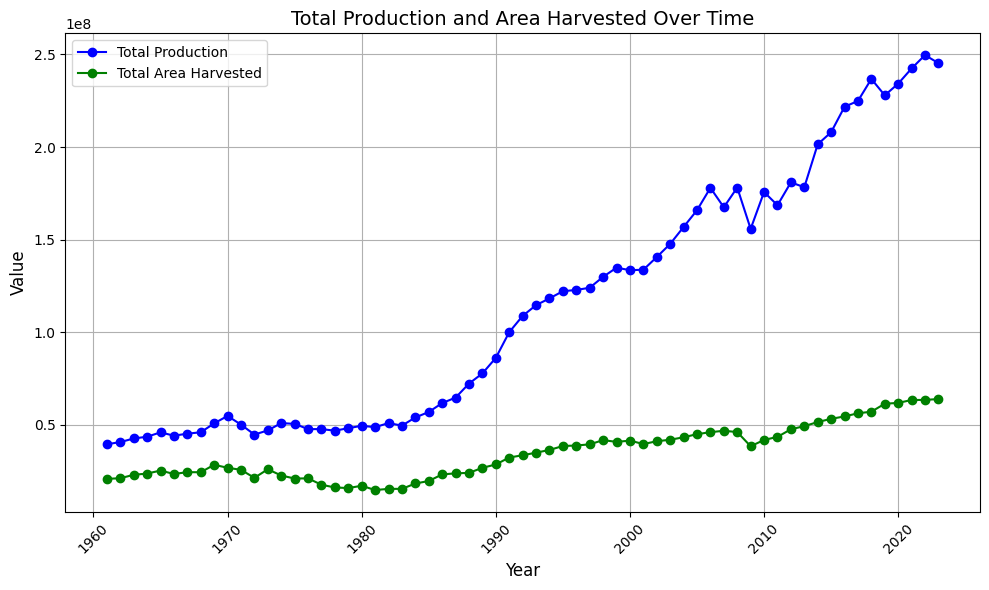

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for relevant elements (e.g., Production and Area harvested)
production_data = crop_livestock[crop_livestock['element'] == 'Production']
area_data = crop_livestock[crop_livestock['element'] == 'Area harvested']

# Group by year and sum the values
production_yearly = production_data.groupby('year')['value'].sum()
area_yearly = area_data.groupby('year')['value'].sum()

# Plotting both production and area harvested over time
plt.figure(figsize=(10, 6))
plt.plot(production_yearly.index, production_yearly.values, label='Total Production', color='b', marker='o')
plt.plot(area_yearly.index, area_yearly.values, label='Total Area Harvested', color='g', marker='o')

# Adding labels and title
plt.title('Total Production and Area Harvested Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


### Relationship between variables

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


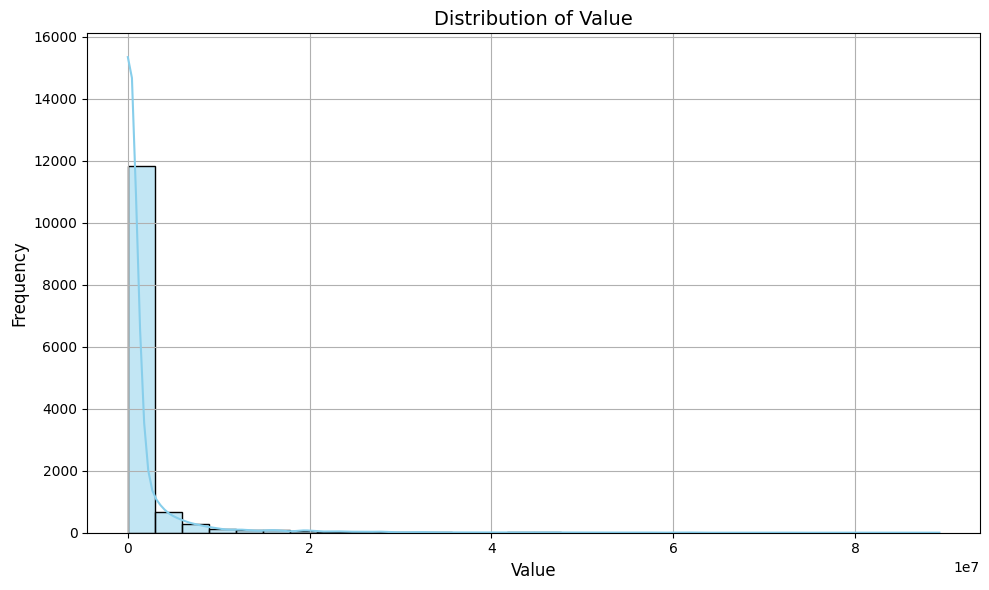

In [47]:
# Plotting the distribution of the 'value' column
plt.figure(figsize=(10, 6))
sns.histplot(crop_livestock['value'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Value', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()


### Relationship between variables

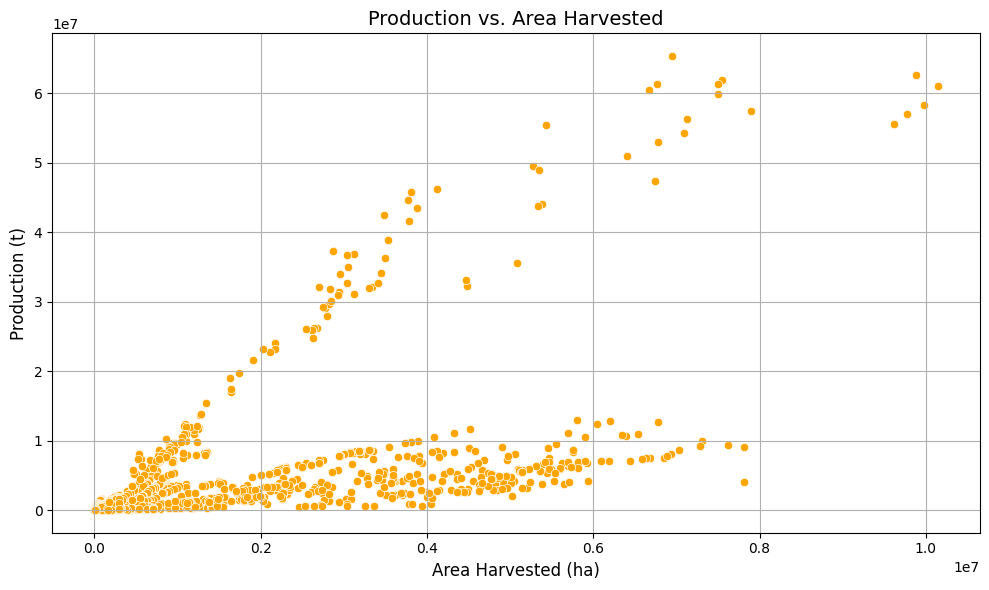

In [48]:

# Merge the production and area harvested data
merged_data = pd.merge(production_data[['item', 'year', 'value']], area_data[['item', 'year', 'value']], on=['item', 'year'], suffixes=('_prod', '_area'))

# Scatter plot of production vs. area harvested
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='value_area', y='value_prod', color='orange')
plt.title('Production vs. Area Harvested', fontsize=14)
plt.xlabel('Area Harvested (ha)', fontsize=12)
plt.ylabel('Production (t)', fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()


### Production for each crop

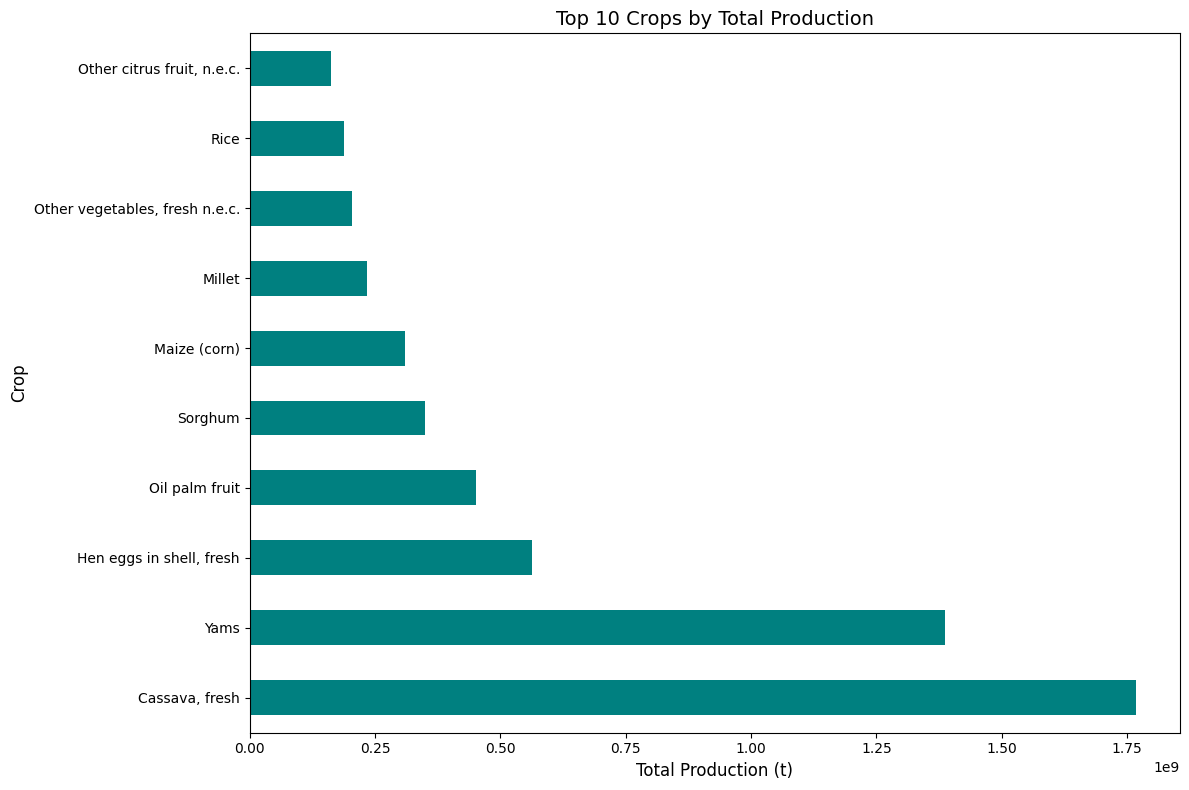

In [49]:
# Group by 'item' and sum the 'value' for each crop (item)
crop_production = production_data.groupby('item')['value'].sum().sort_values(ascending=False)

# Plotting the total production for each crop
plt.figure(figsize=(12, 8))
crop_production.head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Crops by Total Production', fontsize=14)
plt.xlabel('Total Production (t)', fontsize=12)
plt.ylabel('Crop', fontsize=12)
plt.tight_layout()

plt.show()


## Handling Climate Data

In [50]:
climate_data

,PARAMETER,YEAR,LAT,LON,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL AVG
0,PRECTOTCORR,2001,10.0,10.000,0.0,0.0,0.01,1.59,2.68,2.43,4.66,4.20,3.54,0.36,0.0,0.0,1.62
1,PRECTOTCORR,2001,10.0,10.625,0.0,0.0,0.01,1.70,3.83,3.55,5.23,5.71,5.42,0.86,0.0,0.0,2.19
2,PRECTOTCORR,2001,10.0,11.250,0.0,0.0,0.00,1.83,4.73,5.13,5.45,7.00,6.65,1.18,0.0,0.0,2.66
3,PRECTOTCORR,2001,10.0,11.875,0.0,0.0,0.00,1.83,4.79,5.42,5.37,7.12,6.68,1.18,0.0,0.0,2.70
4,PRECTOTCORR,2001,10.0,12.500,0.0,0.0,0.01,2.50,4.45,7.54,7.52,7.91,8.06,1.68,0.0,0.0,3.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9970,PRECTOTCORR,2025,9.0,13.750,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9971,PRECTOTCORR,2025,9.0,14.375,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9972,PRECTOTCORR,2025,9.5,13.125,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9973,PRECTOTCORR,2025,9.5,13.750,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# strip whitespace, lowercase, replace spaces with underscores
climate_data.columns = (
    climate_data.columns
    .str.strip()
    .str.lower()
    .str.replace(r'\s+', '_', regex=True)
)
# Inspect
print(climate_data.columns.tolist())


['parameter', 'year', 'lat', 'lon', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'annual_avg']


In [52]:
climate_data.drop(columns='parameter', inplace=True)

In [53]:
climate_data

,year,lat,lon,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,annual_avg
0,2001,10.0,10.000,0.0,0.0,0.01,1.59,2.68,2.43,4.66,4.20,3.54,0.36,0.0,0.0,1.62
1,2001,10.0,10.625,0.0,0.0,0.01,1.70,3.83,3.55,5.23,5.71,5.42,0.86,0.0,0.0,2.19
2,2001,10.0,11.250,0.0,0.0,0.00,1.83,4.73,5.13,5.45,7.00,6.65,1.18,0.0,0.0,2.66
3,2001,10.0,11.875,0.0,0.0,0.00,1.83,4.79,5.42,5.37,7.12,6.68,1.18,0.0,0.0,2.70
4,2001,10.0,12.500,0.0,0.0,0.01,2.50,4.45,7.54,7.52,7.91,8.06,1.68,0.0,0.0,3.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9970,2025,9.0,13.750,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9971,2025,9.0,14.375,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9972,2025,9.5,13.125,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9973,2025,9.5,13.750,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Melting monthly columns into long forms

In [54]:
climate_df = climate_data.melt(
    id_vars=['year','lat','lon','annual_avg'],
    value_vars=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
    var_name='month',
    value_name='precip_mm_per_day'
)
# Quick check
print(climate_df.head())


   year   lat     lon  annual_avg month  precip_mm_per_day
0  2001  10.0  10.000        1.62   jan                0.0
1  2001  10.0  10.625        2.19   jan                0.0
2  2001  10.0  11.250        2.66   jan                0.0
3  2001  10.0  11.875        2.70   jan                0.0
4  2001  10.0  12.500        3.31   jan                0.0


In [55]:
climate_df

,year,lat,lon,annual_avg,month,precip_mm_per_day
0,2001,10.0,10.000,1.62,jan,0.0
1,2001,10.0,10.625,2.19,jan,0.0
2,2001,10.0,11.250,2.66,jan,0.0
3,2001,10.0,11.875,2.70,jan,0.0
4,2001,10.0,12.500,3.31,jan,0.0
...,...,...,...,...,...,...
119695,2025,9.0,13.750,NaN,dec,NaN
119696,2025,9.0,14.375,NaN,dec,NaN
119697,2025,9.5,13.125,NaN,dec,NaN
119698,2025,9.5,13.750,NaN,dec,NaN


In [56]:
climate_2021 = climate_df[climate_df['year'] == 2021]

climate_2021

,year,lat,lon,annual_avg,month,precip_mm_per_day
6720,2021,10.0,10.000,8.78,jan,0.0
6721,2021,10.0,10.625,5.62,jan,0.0
6722,2021,10.0,11.250,6.24,jan,0.0
6723,2021,10.0,11.875,5.83,jan,0.0
6724,2021,10.0,12.500,7.04,jan,0.0
...,...,...,...,...,...,...
119443,2021,9.0,13.750,2.41,dec,0.0
119444,2021,9.0,14.375,2.50,dec,0.0
119445,2021,9.5,13.125,2.58,dec,0.1
119446,2021,9.5,13.750,2.31,dec,0.0


In [57]:
!pip install reverse_geocoder

import reverse_geocoder as rg
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for reverse_geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268067 sha256=26fdf96ac68e925eda199d25d12224dc20f9b79b6ab65e42560f1266a3e589f7
  Stored in directory: /root/.cache/pip/wheels/17/3c/41/2bc89719586c2a5c53e9a527daa76a968a1288315c1ae2d904
Successfully built reverse_geocoder


In [58]:
# Drop duplicates so only reverse‐geocode each grid point once
coords_df = climate_df[['lat','lon']].drop_duplicates().reset_index(drop=True)
coords = list(zip(coords_df.lat, coords_df.lon))


In [59]:
# mode=2 does a fast k-d tree lookup
results = rg.search(coords, mode=2)  # returns a list of dicts

# Extract the `admin1` field (state/province name)
coords_df['state'] = [res['admin1'] for res in results]


Loading formatted geocoded file...


In [60]:
coords_df

,lat,lon,state
0,10.0,10.000,Bauchi
1,10.0,10.625,Gombe
2,10.0,11.250,Gombe
3,10.0,11.875,Borno
4,10.0,12.500,Adamawa
...,...,...,...
394,9.0,13.750,North Province
395,9.0,14.375,North Province
396,9.5,13.125,North Province
397,9.5,13.750,North Province


In [61]:
coords_df.head(50)

,lat,lon,state
0,10.0,10.000,Bauchi
1,10.0,10.625,Gombe
2,10.0,11.250,Gombe
3,10.0,11.875,Borno
4,10.0,12.500,Adamawa
5,10.0,3.125,Borgou
6,10.0,3.750,Kwara
7,10.0,4.375,Niger
8,10.0,5.000,Niger
9,10.0,5.625,Niger


In [62]:
coords_imo = coords_df[coords_df['state'] == 'Cross River']

coords_imo

,lat,lon,state
189,5.0,8.125,Cross River
206,5.5,8.750,Cross River
222,6.0,8.750,Cross River
238,6.5,8.750,Cross River
239,6.5,9.375,Cross River


In [63]:
print (coords_df['state'].unique())

print (len(coords_df['state'].unique()))

['Bauchi' 'Gombe' 'Borno' 'Adamawa' 'Borgou' 'Kwara' 'Niger' 'Kaduna'
 'Plateau' 'Jigawa' 'Yobe' 'Alibori' 'Kebbi' 'Zamfara' 'Kano' 'Katsina'
 'Atakora' 'Dosso' 'Sokoto' 'Zinder' 'Diffa' 'Maradi' 'Tillaberi' 'Tahoua'
 'Littoral' 'Centre' 'Lagos' 'Delta' 'Bayelsa' 'Rivers' 'Akwa Ibom'
 'Bioko Norte' 'South-West Province' 'West' 'Abia' 'Cross River' 'Ondo'
 'Imo' 'North-West Province' 'Adamaoua' 'Ogun' 'Anambra' 'Enugu' 'Ebonyi'
 'Edo' 'Benue' 'Taraba' 'Kogi' 'Oyo' 'Osun' 'Ekiti' 'Nassarawa'
 'Abuja Federal Capital Territory' 'North Province' 'Far North' 'Lac'
 'East' 'Mayo-Kebbi Ouest']
58


In [64]:
# Join back on lat & lon
climate_df = pd.merge(climate_df, coords_df, on=['lat','lon'], how='left')


In [65]:
climate_df

,year,lat,lon,annual_avg,month,precip_mm_per_day,state
0,2001,10.0,10.000,1.62,jan,0.0,Bauchi
1,2001,10.0,10.625,2.19,jan,0.0,Gombe
2,2001,10.0,11.250,2.66,jan,0.0,Gombe
3,2001,10.0,11.875,2.70,jan,0.0,Borno
4,2001,10.0,12.500,3.31,jan,0.0,Adamawa
...,...,...,...,...,...,...,...
119695,2025,9.0,13.750,NaN,dec,NaN,North Province
119696,2025,9.0,14.375,NaN,dec,NaN,North Province
119697,2025,9.5,13.125,NaN,dec,NaN,North Province
119698,2025,9.5,13.750,NaN,dec,NaN,North Province


### Dropping non nigerian data

In [66]:
nigeria_states = [
    "Abia","Adamawa","Akwa Ibom","Anambra","Bauchi","Bayelsa","Benue","Borno",
    "Cross River","Delta","Ebonyi","Edo","Ekiti","Enugu","Gombe","Imo",
    "Jigawa","Kaduna","Kano","Katsina","Kebbi","Kogi","Kwara","Lagos",
    "Nassarawa","Niger","Ogun","Ondo","Osun","Oyo","Plateau","Rivers",
    "Sokoto","Taraba","Yobe","Zamfara","Abuja Federal Capital Territory"
]

climate_df = climate_df[climate_df['state'].isin(nigeria_states)].reset_index(drop=True)

print(f"Unique states after filtering: {climate_df['state'].unique()}")
print(f"no of states: {len(climate_df['state'].unique())}")

Unique states after filtering: ['Bauchi' 'Gombe' 'Borno' 'Adamawa' 'Kwara' 'Niger' 'Kaduna' 'Plateau'
 'Jigawa' 'Yobe' 'Kebbi' 'Zamfara' 'Kano' 'Katsina' 'Sokoto' 'Lagos'
 'Delta' 'Bayelsa' 'Rivers' 'Akwa Ibom' 'Abia' 'Cross River' 'Ondo' 'Imo'
 'Ogun' 'Anambra' 'Enugu' 'Ebonyi' 'Edo' 'Benue' 'Taraba' 'Kogi' 'Oyo'
 'Osun' 'Ekiti' 'Nassarawa' 'Abuja Federal Capital Territory']
no of states: 37


In [67]:
climate_df.head(50)

,year,lat,lon,annual_avg,month,precip_mm_per_day,state
0,2001,10.0,10.000,1.62,jan,0.0,Bauchi
1,2001,10.0,10.625,2.19,jan,0.0,Gombe
2,2001,10.0,11.250,2.66,jan,0.0,Gombe
3,2001,10.0,11.875,2.70,jan,0.0,Borno
4,2001,10.0,12.500,3.31,jan,0.0,Adamawa
5,2001,10.0,3.750,2.21,jan,0.0,Kwara
6,2001,10.0,4.375,2.23,jan,0.0,Niger
7,2001,10.0,5.000,2.56,jan,0.0,Niger
8,2001,10.0,5.625,2.83,jan,0.0,Niger
9,2001,10.0,6.250,3.07,jan,0.0,Niger


In [68]:
print (climate_df['state'].unique())

['Bauchi' 'Gombe' 'Borno' 'Adamawa' 'Kwara' 'Niger' 'Kaduna' 'Plateau'
 'Jigawa' 'Yobe' 'Kebbi' 'Zamfara' 'Kano' 'Katsina' 'Sokoto' 'Lagos'
 'Delta' 'Bayelsa' 'Rivers' 'Akwa Ibom' 'Abia' 'Cross River' 'Ondo' 'Imo'
 'Ogun' 'Anambra' 'Enugu' 'Ebonyi' 'Edo' 'Benue' 'Taraba' 'Kogi' 'Oyo'
 'Osun' 'Ekiti' 'Nassarawa' 'Abuja Federal Capital Territory']


### Mean Precipitation per state

In [69]:
state_monthly_precip = (
    climate_df
    .groupby(['state','year','month'])['precip_mm_per_day']
    .mean()
    .reset_index()
)

state_monthly_precip.head()


,state,year,month,precip_mm_per_day
0,Abia,2001,apr,13.693333
1,Abia,2001,aug,8.100000
2,Abia,2001,dec,0.573333
3,Abia,2001,feb,3.743333
4,Abia,2001,jan,0.550000


In [70]:
climate_nigeria = state_monthly_precip

In [71]:
climate_nigeria

,state,year,month,precip_mm_per_day
0,Abia,2001,apr,13.693333
1,Abia,2001,aug,8.100000
2,Abia,2001,dec,0.573333
3,Abia,2001,feb,3.743333
4,Abia,2001,jan,0.550000
...,...,...,...,...
11095,Zamfara,2025,mar,NaN
11096,Zamfara,2025,may,NaN
11097,Zamfara,2025,nov,NaN
11098,Zamfara,2025,oct,NaN


In [72]:
state_monthly_wide = state_monthly_precip.pivot(
    index=['state','year'],
    columns='month',
    values='precip_mm_per_day'
).reset_index()

# Rename the month columns for clarity
state_monthly_wide.columns = ['state','year'] + [f'precip_{m:02d}' for m in range(1,13)]
state_monthly_wide.head()


,state,year,precip_01,precip_02,precip_03,precip_04,precip_05,precip_06,precip_07,precip_08,precip_09,precip_10,precip_11,precip_12
0,Abia,2001,13.693333,8.100000,0.573333,3.743333,0.550000,8.050000,14.280000,2.256667,8.176667,5.220000,7.930000,13.686667
1,Abia,2002,13.206667,8.290000,0.216667,0.330000,0.036667,15.706667,5.260000,4.373333,6.993333,1.476667,7.326667,5.233333
2,Abia,2003,6.536667,5.060000,0.456667,5.266667,2.393333,5.480000,5.673333,1.123333,9.746667,1.830000,10.376667,9.426667
3,Abia,2004,6.560000,8.170000,0.136667,0.330000,1.733333,5.726667,9.670000,0.500000,9.676667,4.090000,4.980000,11.233333
4,Abia,2005,3.600000,8.453333,0.100000,1.026667,0.290000,4.890000,6.270000,3.750000,3.310000,1.756667,8.080000,18.276667


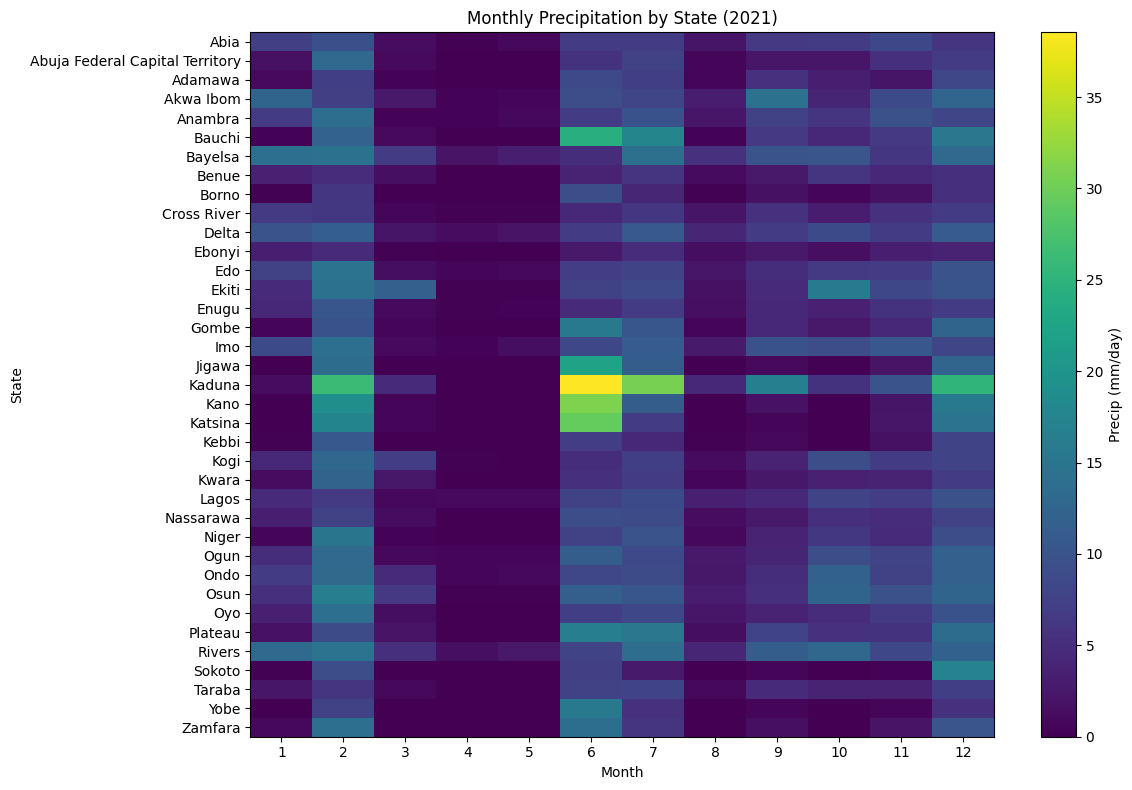

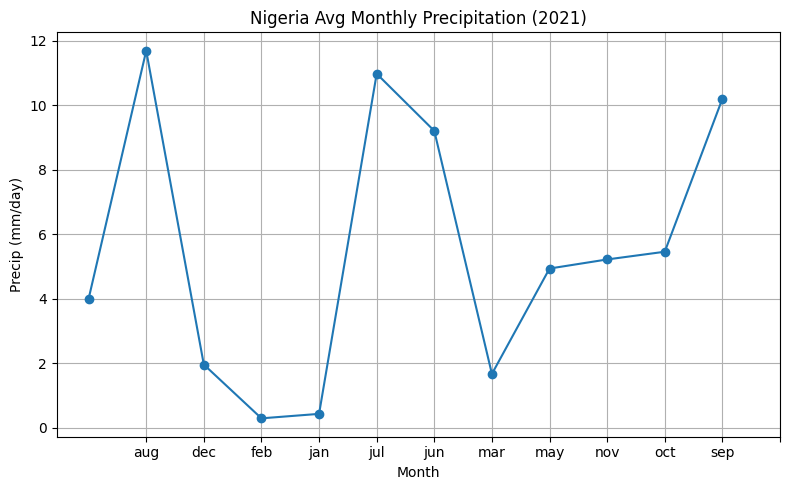

In [73]:
year2021_data = state_monthly_precip[state_monthly_precip['year'] == 2021]

# Pivot for heatmap
pivot_wide = year2021_data.pivot(index='state', columns='month', values='precip_mm_per_day')

# Plot A) Heatmap of 2021 monthly precipitation by state
plt.figure(figsize=(12,8))
plt.imshow(pivot_wide, aspect='auto')
plt.colorbar(label='Precip (mm/day)')
plt.xticks(range(12), range(1,13))
plt.yticks(range(len(pivot_wide.index)), pivot_wide.index)
plt.title('Monthly Precipitation by State (2021)')
plt.xlabel('Month')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# Plot B) Nationwide average monthly precipitation (2021)
nationwide = (
    year2021_data
    .groupby('month')['precip_mm_per_day']
    .mean()
    .reset_index()
)
plt.figure(figsize=(8,5))
plt.plot(nationwide['month'], nationwide['precip_mm_per_day'], marker='o')
plt.title('Nigeria Avg Monthly Precipitation (2021)')
plt.xlabel('Month')
plt.ylabel('Precip (mm/day)')
plt.xticks(range(1,13))
plt.grid(True)
plt.tight_layout()
plt.show()

## Feature Engineering

### Farmer Survey Data (Finance Data)

### Financia Inclusion score

Combine multiple digital-finance flags into one metric (0–5):



In [74]:
# Assuming columns are 0/1 or 'Yes'/'No'; first convert to 0/1
fi_cols = [
    'Bank Account', 'Mobile Money Account',
    'DebitCard Ownership', 'Internet Banking',
    'Any Digital Payment'
]
for c in fi_cols:
    finance_data[c] = finance_data[c].map({'Yes':1, 'No':0, 'Missing':0})

# Create the score
finance_data['fin_inclusion_score'] = finance_data[fi_cols].sum(axis=1)


Education and Experience

In [75]:
edu_map = {'Missing':0, 'Primary':1, 'Secondary':2, 'Tertiary':3}
finance_data['edu_score'] = finance_data['Education'].map(edu_map)


Income Category

In [76]:
inc_map = {'Very Poor':1, 'Poor':2, 'Average':3, 'Rich':4, 'Very Rich':5}
finance_data['income_score'] = finance_data['Household Income'].map(inc_map)


Digital Behaviour

In [77]:
finance_data['saved_last_year']   = finance_data['Saved in the Past Year'].map({'Yes':1,'No':0})
finance_data['borrowed_last_year'] = finance_data['Borrowed in the Past Year'].map({'Yes':1,'No':0})


In [78]:
finance_data

,Gender,Age,Education,Household Income,Employment Status,Location,Bank Account,Mobile Money Account,Govt Assisted,DebitCard Ownership,...,Remittances,Mobile Owner,Internet Access,Any Digital Payment,Merchant Pay_Dig,fin_inclusion_score,edu_score,income_score,saved_last_year,borrowed_last_year
0,Female,25,Primary,Average,Employed,Rural,0,0,Missing,0,...,did not send/receive,No,No,0,No,0,1,3,0,1
1,Male,25,Secondary,Rich,Employed,Urban,1,0,No,1,...,sent/received through an account,Yes,No,1,Yes,3,2,4,1,1
2,Female,18,Secondary,Very Poor,Employed,Rural,0,0,Missing,0,...,sent/received through an account,Yes,Yes,0,No,0,2,1,1,0
3,Male,23,Secondary,Rich,Employed,Rural,0,0,Missing,0,...,did not send/receive,Yes,No,0,No,0,2,4,0,1
4,Male,25,Secondary,Very Rich,Unemployed,Rural,0,0,Missing,0,...,did not send/receive,Yes,Yes,0,No,0,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,Male,23,Secondary,Very Rich,Employed,Urban,1,1,No,1,...,did not send/receive,Yes,Yes,1,Yes,4,2,5,1,1
303,Male,22,Secondary,Very Poor,Unemployed,Urban,0,0,Missing,0,...,did not send/receive,Yes,Yes,0,No,0,2,1,0,1
304,Female,20,Secondary,Very Poor,Employed,Rural,1,0,No,0,...,did not send/receive,Yes,No,0,No,1,2,1,0,0
305,Male,20,Secondary,Very Rich,Employed,Rural,1,0,No,1,...,sent/received through an account,Yes,Yes,1,No,4,2,5,0,1


### Crop/Livestock Data

Pivot to Wide Format for 2021

In [79]:
cl21 = crop_livestock[crop_livestock['year'] == 2021]
crop21 = cl21.pivot_table(
    index='item', 
    columns='element', 
    values='value', 
    aggfunc='sum'
).reset_index()
crop21.columns.name = None
crop21.columns = [c.lower().replace(' ', '_') for c in crop21.columns]


In [80]:
crop21

,item,area_harvested,laying,milk_animals,producing_animals/slaughtered,production,stocks,yield,yield/carcass_weight
0,Asses,NaN,NaN,NaN,NaN,NaN,1344623.0,NaN,NaN
1,Bananas,525177.0,NaN,NaN,NaN,7388610.00,NaN,14068.8,NaN
2,"Beer of barley, malted",NaN,NaN,NaN,NaN,1799800.00,NaN,NaN,NaN
3,Butter of cow milk,NaN,NaN,NaN,NaN,11857.48,NaN,NaN,NaN
4,"Buttermilk, dry",NaN,NaN,NaN,NaN,2268.80,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
90,Taro,1337500.0,NaN,NaN,NaN,8202650.00,NaN,6132.8,NaN
91,Tomatoes,926798.0,NaN,NaN,NaN,3477981.00,NaN,3752.7,NaN
92,Unmanufactured tobacco,9706.0,NaN,NaN,NaN,5629.63,NaN,580.0,NaN
93,Wheat,11820.0,NaN,NaN,NaN,36944.00,NaN,3125.5,NaN


### Profitability proxy

In [81]:
#Production per hectare
crop21['prod_per_ha'] = crop21['production'] / crop21['area_harvested']


In [82]:
#High volume production
threshold = crop21['production'].quantile(0.75)
crop21['high_volume_crop'] = (crop21['production'] >= threshold).astype(int)


In [83]:
crop21

,item,area_harvested,laying,milk_animals,producing_animals/slaughtered,production,stocks,yield,yield/carcass_weight,prod_per_ha,high_volume_crop
0,Asses,NaN,NaN,NaN,NaN,NaN,1344623.0,NaN,NaN,NaN,0
1,Bananas,525177.0,NaN,NaN,NaN,7388610.00,NaN,14068.8,NaN,14.068800,1
2,"Beer of barley, malted",NaN,NaN,NaN,NaN,1799800.00,NaN,NaN,NaN,NaN,1
3,Butter of cow milk,NaN,NaN,NaN,NaN,11857.48,NaN,NaN,NaN,NaN,0
4,"Buttermilk, dry",NaN,NaN,NaN,NaN,2268.80,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
90,Taro,1337500.0,NaN,NaN,NaN,8202650.00,NaN,6132.8,NaN,6.132822,1
91,Tomatoes,926798.0,NaN,NaN,NaN,3477981.00,NaN,3752.7,NaN,3.752685,1
92,Unmanufactured tobacco,9706.0,NaN,NaN,NaN,5629.63,NaN,580.0,NaN,0.580015,0
93,Wheat,11820.0,NaN,NaN,NaN,36944.00,NaN,3125.5,NaN,3.125550,0


### Climate data

In [84]:
climate_2021

,year,lat,lon,annual_avg,month,precip_mm_per_day
6720,2021,10.0,10.000,8.78,jan,0.0
6721,2021,10.0,10.625,5.62,jan,0.0
6722,2021,10.0,11.250,6.24,jan,0.0
6723,2021,10.0,11.875,5.83,jan,0.0
6724,2021,10.0,12.500,7.04,jan,0.0
...,...,...,...,...,...,...
119443,2021,9.0,13.750,2.41,dec,0.0
119444,2021,9.0,14.375,2.50,dec,0.0
119445,2021,9.5,13.125,2.58,dec,0.1
119446,2021,9.5,13.750,2.31,dec,0.0


In [85]:
climate_nigeria

,state,year,month,precip_mm_per_day
0,Abia,2001,apr,13.693333
1,Abia,2001,aug,8.100000
2,Abia,2001,dec,0.573333
3,Abia,2001,feb,3.743333
4,Abia,2001,jan,0.550000
...,...,...,...,...
11095,Zamfara,2025,mar,NaN
11096,Zamfara,2025,may,NaN
11097,Zamfara,2025,nov,NaN
11098,Zamfara,2025,oct,NaN


### Annual mean rainfall

In [86]:
# 1a) Filtering the years wanted (2001–2024)
hist = climate_nigeria[
    climate_nigeria['year'].between(2001, 2024)
].copy()

# 1b) Compute the yearly average per state
annual_mean = (
    hist
    .groupby(['state','year'])['precip_mm_per_day']
    .mean()
    .reset_index(name='annual_precip')
)

# 1c) Collapse to one number per state: the long-term mean
state_mean = (
    annual_mean
    .groupby('state')['annual_precip']
    .mean()
    .reset_index(name='clim_annual_mean')
)


In [87]:
state_mean

,state,clim_annual_mean
0,Abia,5.409155
1,Abuja Federal Capital Territory,3.157535
2,Adamawa,3.009464
3,Akwa Ibom,6.925417
4,Anambra,4.644236
5,Bauchi,2.401154
6,Bayelsa,5.925255
7,Benue,3.689008
8,Borno,1.861819
9,Cross River,5.878451


In [88]:
annual_mean

,state,year,annual_precip
0,Abia,2001,7.188333
1,Abia,2002,5.704167
2,Abia,2003,5.280833
3,Abia,2004,5.233889
4,Abia,2005,4.983611
...,...,...,...
883,Zamfara,2020,3.593833
884,Zamfara,2021,4.067833
885,Zamfara,2022,3.544583
886,Zamfara,2023,1.771917


### Rainfall variability(Std. Dev)

In [89]:
# 2a) Compute per-year std dev, then long-term average of those
annual_std = (
    hist
    .groupby(['state','year'])['precip_mm_per_day']
    .std()
    .reset_index(name='yearly_std')
)

state_std = (
    annual_std
    .groupby('state')['yearly_std']
    .mean()
    .reset_index(name='clim_monthly_std')
)


In [90]:
state_std

,state,clim_monthly_std
0,Abia,4.137677
1,Abuja Federal Capital Territory,3.242363
2,Adamawa,3.171512
3,Akwa Ibom,5.324253
4,Anambra,3.996043
5,Bauchi,3.000643
6,Bayelsa,4.109296
7,Benue,3.089054
8,Borno,2.507229
9,Cross River,4.615356


### Peak Rain month

In [91]:
# 3a) Compute long-term average precipitation per state × month
month_mean = (
    hist
    .groupby(['state','month'])['precip_mm_per_day']
    .mean()
    .reset_index(name='avg_precip_mm_per_day')
)

# 3b) For each state, pick the month with the highest average
idx = month_mean.groupby('state')['avg_precip_mm_per_day'].idxmax()
state_peak = (
    month_mean.loc[idx, ['state','month']]
    .rename(columns={'month':'clim_peak_month'})
)


In [92]:
month_mean

,state,month,avg_precip_mm_per_day
0,Abia,apr,5.254583
1,Abia,aug,8.858056
2,Abia,dec,0.478333
3,Abia,feb,1.366111
4,Abia,jan,0.700278
...,...,...,...
439,Zamfara,mar,0.108333
440,Zamfara,may,2.324875
441,Zamfara,nov,0.066625
442,Zamfara,oct,1.563167


In [93]:
idx

state
Abia                                11
Abuja Federal Capital Territory     13
Adamawa                             25
Akwa Ibom                           47
Anambra                             59
Bauchi                              61
Bayelsa                             78
Benue                               95
Borno                               97
Cross River                        119
Delta                              126
Ebonyi                             143
Edo                                155
Ekiti                              167
Enugu                              179
Gombe                              181
Imo                                203
Jigawa                             205
Kaduna                             217
Kano                               229
Katsina                            241
Kebbi                              253
Kogi                               275
Kwara                              287
Lagos                              294
Nassarawa          

### Wet season Onset month

In [94]:
threshold = 5

# 4a) Among all state×month averages, find first month ≥ threshold
onset = (
    month_mean[month_mean['avg_precip_mm_per_day'] >= threshold]
    .sort_values(['state','month'])
    .drop_duplicates('state', keep='first')
    [['state','month']]
    .rename(columns={'month':'clim_onset_month'})
)

# 4b) Ensure every state appears (fill missing with 0)
all_states = month_mean[['state']].drop_duplicates()
state_onset = (
    all_states
    .merge(onset, on='state', how='left')
    .fillna({'clim_onset_month': 0})
)


In [95]:
all_states

,state
0,Abia
12,Abuja Federal Capital Territory
24,Adamawa
36,Akwa Ibom
48,Anambra
60,Bauchi
72,Bayelsa
84,Benue
96,Borno
108,Cross River


In [96]:
onset

,state,clim_onset_month
0,Abia,apr
13,Abuja Federal Capital Territory,aug
25,Adamawa,aug
36,Akwa Ibom,apr
49,Anambra,aug
61,Bauchi,aug
72,Bayelsa,apr
85,Benue,aug
97,Borno,aug
108,Cross River,apr


### Trend Rainfall

In [97]:
trends = []
for st, df in annual_mean.groupby('state'):
    yrs = df['year'].values
    rains = df['annual_precip'].values
    slope, intercept = np.polyfit(yrs, rains, 1)
    trends.append({
        'state': st,
        'clim_trend_slope': slope,
        'clim_trend_intercept': intercept
    })

state_trend = pd.DataFrame(trends)


In [98]:
state_trend

,state,clim_trend_slope,clim_trend_intercept
0,Abia,-0.048475,102.964606
1,Abuja Federal Capital Territory,0.023410,-43.955625
2,Adamawa,0.014255,-25.678789
3,Akwa Ibom,-0.021912,51.023229
4,Anambra,0.039909,-75.672014
5,Bauchi,0.107064,-213.065409
6,Bayelsa,0.061960,-118.769375
7,Benue,-0.072861,150.321752
8,Borno,0.040056,-78.750837
9,Cross River,-0.120270,247.921681


### Combining into one table

In [99]:
state_climate_feats = (
    state_mean
    .merge(state_std,   on='state')
    .merge(state_peak,  on='state')
    .merge(state_onset, on='state')
    .merge(state_trend, on='state')
)


In [100]:
state_climate_feats

,state,clim_annual_mean,clim_monthly_std,clim_peak_month,clim_onset_month,clim_trend_slope,clim_trend_intercept
0,Abia,5.409155,4.137677,sep,apr,-0.048475,102.964606
1,Abuja Federal Capital Territory,3.157535,3.242363,aug,aug,0.023410,-43.955625
2,Adamawa,3.009464,3.171512,aug,aug,0.014255,-25.678789
3,Akwa Ibom,6.925417,5.324253,sep,apr,-0.021912,51.023229
4,Anambra,4.644236,3.996043,sep,aug,0.039909,-75.672014
5,Bauchi,2.401154,3.000643,aug,aug,0.107064,-213.065409
6,Bayelsa,5.925255,4.109296,jun,apr,0.061960,-118.769375
7,Benue,3.689008,3.089054,sep,aug,-0.072861,150.321752
8,Borno,1.861819,2.507229,aug,aug,0.040056,-78.750837
9,Cross River,5.878451,4.615356,sep,apr,-0.120270,247.921681


### Mapping month names to numbers

In [101]:
# Define the map
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct':10, 'nov':11, 'dec':12
}

# Apply to both columns
state_climate_feats['clim_peak_month']  = state_climate_feats['clim_peak_month'].map(month_map)
state_climate_feats['clim_onset_month'] = state_climate_feats['clim_onset_month'].map(month_map)


In [102]:
print(state_climate_feats.dtypes)


state                    object
clim_annual_mean        float64
clim_monthly_std        float64
clim_peak_month           int64
clim_onset_month          int64
clim_trend_slope        float64
clim_trend_intercept    float64
dtype: object


In [103]:
state_climate_feats


,state,clim_annual_mean,clim_monthly_std,clim_peak_month,clim_onset_month,clim_trend_slope,clim_trend_intercept
0,Abia,5.409155,4.137677,9,4,-0.048475,102.964606
1,Abuja Federal Capital Territory,3.157535,3.242363,8,8,0.023410,-43.955625
2,Adamawa,3.009464,3.171512,8,8,0.014255,-25.678789
3,Akwa Ibom,6.925417,5.324253,9,4,-0.021912,51.023229
4,Anambra,4.644236,3.996043,9,8,0.039909,-75.672014
5,Bauchi,2.401154,3.000643,8,8,0.107064,-213.065409
6,Bayelsa,5.925255,4.109296,6,4,0.061960,-118.769375
7,Benue,3.689008,3.089054,9,8,-0.072861,150.321752
8,Borno,1.861819,2.507229,8,8,0.040056,-78.750837
9,Cross River,5.878451,4.615356,9,4,-0.120270,247.921681


In [104]:
finance_data 

,Gender,Age,Education,Household Income,Employment Status,Location,Bank Account,Mobile Money Account,Govt Assisted,DebitCard Ownership,...,Remittances,Mobile Owner,Internet Access,Any Digital Payment,Merchant Pay_Dig,fin_inclusion_score,edu_score,income_score,saved_last_year,borrowed_last_year
0,Female,25,Primary,Average,Employed,Rural,0,0,Missing,0,...,did not send/receive,No,No,0,No,0,1,3,0,1
1,Male,25,Secondary,Rich,Employed,Urban,1,0,No,1,...,sent/received through an account,Yes,No,1,Yes,3,2,4,1,1
2,Female,18,Secondary,Very Poor,Employed,Rural,0,0,Missing,0,...,sent/received through an account,Yes,Yes,0,No,0,2,1,1,0
3,Male,23,Secondary,Rich,Employed,Rural,0,0,Missing,0,...,did not send/receive,Yes,No,0,No,0,2,4,0,1
4,Male,25,Secondary,Very Rich,Unemployed,Rural,0,0,Missing,0,...,did not send/receive,Yes,Yes,0,No,0,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,Male,23,Secondary,Very Rich,Employed,Urban,1,1,No,1,...,did not send/receive,Yes,Yes,1,Yes,4,2,5,1,1
303,Male,22,Secondary,Very Poor,Unemployed,Urban,0,0,Missing,0,...,did not send/receive,Yes,Yes,0,No,0,2,1,0,1
304,Female,20,Secondary,Very Poor,Employed,Rural,1,0,No,0,...,did not send/receive,Yes,No,0,No,1,2,1,0,0
305,Male,20,Secondary,Very Rich,Employed,Rural,1,0,No,1,...,sent/received through an account,Yes,Yes,1,No,4,2,5,0,1


## Merging the three datasets

### Collapsing climate to National trend

This is necessary to build the end-to-end model now as there is no State column on the farmer's profile data (finance_data)
with which we join this climate data on a state level.
However, the prototype built will collect data on a state level and the more nuanced state data would be plugged to more accurately 
access creditworthiness

In [105]:
# Take your full state × month table (state_monthly_precip)
# which has columns: state, year, month, precip_mm_per_day

annual_state = (
    state_monthly_precip
    .groupby(['state','year'])['precip_mm_per_day']  # grab the rain column
    .mean()                                           # average over 12 months
    .reset_index(name='annual_precip')                # name it annual_precip
)


In [106]:
month_mean

,state,month,avg_precip_mm_per_day
0,Abia,apr,5.254583
1,Abia,aug,8.858056
2,Abia,dec,0.478333
3,Abia,feb,1.366111
4,Abia,jan,0.700278
...,...,...,...
439,Zamfara,mar,0.108333
440,Zamfara,may,2.324875
441,Zamfara,nov,0.066625
442,Zamfara,oct,1.563167


In [107]:
state_monthly_precip['month'] = (
    state_monthly_precip['month']
    .str.lower()
    .map(month_map)
)

In [108]:
month_mean = (
    state_monthly_precip
    .groupby('month')['precip_mm_per_day']
    .mean()
    .reset_index()
)


In [109]:
month_mean

,month,precip_mm_per_day
0,1,0.348017
1,2,0.663654
2,3,1.521527
3,4,3.319072
4,5,4.540125
5,6,6.406693
6,7,7.017032
7,8,7.372815
8,9,7.699923
9,10,4.491933


### Compute National Peak and Onset safely

In [110]:
# Peak month as integer
nat_peak_month = int(month_mean.loc[month_mean['precip_mm_per_day'].idxmax(), 'month'])

# Onset month: first month where national avg ≥ threshold
threshold = 5
onset_series = month_mean[month_mean['precip_mm_per_day'] >= threshold]
nat_onset_month = int(onset_series['month'].min()) if not onset_series.empty else 0


In [111]:
# Use historical annual_state (state, year, annual_precip) DataFrame
# computed earlier.

# Average annual mean across states
nat_mean = annual_state['annual_precip'].mean()

# Average monthly variability across states
# First, recompute yearly_std per state-year if you need:
annual_std = (
    annual_state
    .groupby(['state','year'])['annual_precip']
    .std()
    .reset_index(name='yearly_std')
)

nat_std = annual_std['yearly_std'].mean()

# Peak month nationwide: find month_mean as before, then average by month
month_mean = (
    state_monthly_precip
    .groupby('month')['precip_mm_per_day']
    .mean()
    .reset_index()
)
nat_peak_month = int(month_mean.loc[month_mean['precip_mm_per_day'].idxmax(), 'month'])

# Onset month nationwide
threshold = 50
onset_n = (
    month_mean[month_mean['precip_mm_per_day'] >= threshold]
    .sort_values('month')
    .iloc[0]['month'] if not month_mean[month_mean['precip_mm_per_day'] >= threshold].empty else 0
)

# Trend nationwide: fit slope across (year, national annual mean)
# First compute national annual mean by year
nat_annual_yearly = (
    annual_state
    .groupby('year')['annual_precip']
    .mean()
    .reset_index()
)
yrs = nat_annual_yearly['year'].values
rains = nat_annual_yearly['annual_precip'].values
slope, intercept = np.polyfit(yrs, rains, 1)

# Pack into a dict
national_climate = {
    'clim_annual_mean_nat': nat_mean,
    'clim_monthly_std_nat': nat_std,
    'clim_peak_month_nat': nat_peak_month,
    'clim_onset_month_nat': int(onset_n),
    'clim_trend_slope_nat': slope,
    'clim_trend_intercept_nat': intercept
}


In [112]:
national_climate

{'clim_annual_mean_nat': 3.641944229147979,
 'clim_monthly_std_nat': nan,
 'clim_peak_month_nat': 9,
 'clim_onset_month_nat': 0,
 'clim_trend_slope_nat': 0.003966584343459028,
 'clim_trend_intercept_nat': -4.342790054235041}

### Attach to finance_data

In [113]:
#for feat, val in national_climate.items():
 #   finance_data[feat] = val

In [114]:
finance_data

,Gender,Age,Education,Household Income,Employment Status,Location,Bank Account,Mobile Money Account,Govt Assisted,DebitCard Ownership,...,Remittances,Mobile Owner,Internet Access,Any Digital Payment,Merchant Pay_Dig,fin_inclusion_score,edu_score,income_score,saved_last_year,borrowed_last_year
0,Female,25,Primary,Average,Employed,Rural,0,0,Missing,0,...,did not send/receive,No,No,0,No,0,1,3,0,1
1,Male,25,Secondary,Rich,Employed,Urban,1,0,No,1,...,sent/received through an account,Yes,No,1,Yes,3,2,4,1,1
2,Female,18,Secondary,Very Poor,Employed,Rural,0,0,Missing,0,...,sent/received through an account,Yes,Yes,0,No,0,2,1,1,0
3,Male,23,Secondary,Rich,Employed,Rural,0,0,Missing,0,...,did not send/receive,Yes,No,0,No,0,2,4,0,1
4,Male,25,Secondary,Very Rich,Unemployed,Rural,0,0,Missing,0,...,did not send/receive,Yes,Yes,0,No,0,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,Male,23,Secondary,Very Rich,Employed,Urban,1,1,No,1,...,did not send/receive,Yes,Yes,1,Yes,4,2,5,1,1
303,Male,22,Secondary,Very Poor,Unemployed,Urban,0,0,Missing,0,...,did not send/receive,Yes,Yes,0,No,0,2,1,0,1
304,Female,20,Secondary,Very Poor,Employed,Rural,1,0,No,0,...,did not send/receive,Yes,No,0,No,1,2,1,0,0
305,Male,20,Secondary,Very Rich,Employed,Rural,1,0,No,1,...,sent/received through an account,Yes,Yes,1,No,4,2,5,0,1


In [115]:
import numpy as np

# 1) Ensure months numeric (if needed)
# ... [same mapping as before] ...

# 2) annual_state: per-state, per-year average
annual_state = (
    state_monthly_precip
    .groupby(['state','year'])['precip_mm_per_day']
    .mean()
    .reset_index(name='annual_precip')
)

# 3) National annual mean
nat_mean = annual_state['annual_precip'].mean()

# 4) National monthly means
month_mean = (
    state_monthly_precip
    .groupby('month')['precip_mm_per_day']
    .mean()
    .reset_index()
)

# 5) National monthly variability (std dev of those 12 months)
nat_std = month_mean['precip_mm_per_day'].std()

# 6) National peak & onset months
nat_peak_month = int(month_mean.loc[month_mean['precip_mm_per_day'].idxmax(), 'month'])
threshold = 50
onset_series = month_mean[month_mean['precip_mm_per_day'] >= threshold]
nat_onset_month = int(onset_series['month'].min()) if not onset_series.empty else 0

# 7) National trend slope & intercept
nat_yr = annual_state.groupby('year')['annual_precip'].mean().reset_index()
slope, intercept = np.polyfit(nat_yr['year'], nat_yr['annual_precip'], 1)

# 8) Pack into dict
national_climate = {
    'clim_annual_mean_nat'     : nat_mean,
    'clim_monthly_std_nat'     : nat_std,
    'clim_peak_month_nat'      : nat_peak_month,
    'clim_onset_month_nat'     : nat_onset_month,
    'clim_trend_slope_nat'     : slope,
    'clim_trend_intercept_nat' : intercept
}

# 9) Attach to finance_data
#for feat, val in national_climate.items():
 #   finance_data[feat] = val


In [116]:
finance_data

,Gender,Age,Education,Household Income,Employment Status,Location,Bank Account,Mobile Money Account,Govt Assisted,DebitCard Ownership,...,Remittances,Mobile Owner,Internet Access,Any Digital Payment,Merchant Pay_Dig,fin_inclusion_score,edu_score,income_score,saved_last_year,borrowed_last_year
0,Female,25,Primary,Average,Employed,Rural,0,0,Missing,0,...,did not send/receive,No,No,0,No,0,1,3,0,1
1,Male,25,Secondary,Rich,Employed,Urban,1,0,No,1,...,sent/received through an account,Yes,No,1,Yes,3,2,4,1,1
2,Female,18,Secondary,Very Poor,Employed,Rural,0,0,Missing,0,...,sent/received through an account,Yes,Yes,0,No,0,2,1,1,0
3,Male,23,Secondary,Rich,Employed,Rural,0,0,Missing,0,...,did not send/receive,Yes,No,0,No,0,2,4,0,1
4,Male,25,Secondary,Very Rich,Unemployed,Rural,0,0,Missing,0,...,did not send/receive,Yes,Yes,0,No,0,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,Male,23,Secondary,Very Rich,Employed,Urban,1,1,No,1,...,did not send/receive,Yes,Yes,1,Yes,4,2,5,1,1
303,Male,22,Secondary,Very Poor,Unemployed,Urban,0,0,Missing,0,...,did not send/receive,Yes,Yes,0,No,0,2,1,0,1
304,Female,20,Secondary,Very Poor,Employed,Rural,1,0,No,0,...,did not send/receive,Yes,No,0,No,1,2,1,0,0
305,Male,20,Secondary,Very Rich,Employed,Rural,1,0,No,1,...,sent/received through an account,Yes,Yes,1,No,4,2,5,0,1


In [117]:
for col in finance_data.columns:
    print(f'columns: {col}')
    print(finance_data[col].unique())
    print('----')


columns: Gender
['Female' 'Male']
----
columns: Age
[25 18 23 20 22 21 19 24]
----
columns: Education
['Primary' 'Secondary' 'Tertiary' 'Missing']
----
columns: Household Income
['Average' 'Rich' 'Very Poor' 'Very Rich' 'Poor']
----
columns: Employment Status
['Employed' 'Unemployed']
----
columns: Location
['Rural' 'Urban']
----
columns: Bank Account
[0 1]
----
columns: Mobile Money Account
[0 1]
----
columns: Govt Assisted
['Missing' 'No' 'Yes']
----
columns: DebitCard Ownership
[0 1]
----
columns: DebitCard Usage
['Missing' 'Yes' 'No']
----
columns: Internet Banking
[0 1]
----
columns: Account Withdraw
['Missing' 'Yes' 'No']
----
columns: Account Literacy
['No' 'Missing' 'Yes']
----
columns: No Account- Distance
['Yes' 'Missing' 'No']
----
columns: No Account- Expensive
['Yes' 'Missing' 'No']
----
columns: No Account- Lack of Documentation
['Yes' 'Missing' 'No']
----
columns: No Account- Lacks Trust
['Yes' 'Missing' 'No']
----
columns: No Account- Religious Reasons
['No' 'Missing' '

### Creating a smart target

In [118]:
# Map values to 0/1
finance_data['received_ag_payment'] = (finance_data['Received Agricultural Payment'] == 'Yes').astype(int)

# Calculate updated reliability_score
finance_data['reliability_score'] = (
    2 * finance_data['received_ag_payment'] +
    1 * finance_data['saved_last_year'] +
    1 * finance_data['borrowed_last_year']
)

# Set target: score ≥ 4/3 (i.e., 2 or more) → good standing
finance_data['target'] = (finance_data['reliability_score'] >= (4/3)).astype(int)



In [119]:
finance_data['Crop_Livestock Farming'] = finance_data['Crop_Livestock Farming'].replace('Missing', 'Crop')

In [120]:
finance_data

,Gender,Age,Education,Household Income,Employment Status,Location,Bank Account,Mobile Money Account,Govt Assisted,DebitCard Ownership,...,Any Digital Payment,Merchant Pay_Dig,fin_inclusion_score,edu_score,income_score,saved_last_year,borrowed_last_year,received_ag_payment,reliability_score,target
0,Female,25,Primary,Average,Employed,Rural,0,0,Missing,0,...,0,No,0,1,3,0,1,1,3,1
1,Male,25,Secondary,Rich,Employed,Urban,1,0,No,1,...,1,Yes,3,2,4,1,1,0,2,1
2,Female,18,Secondary,Very Poor,Employed,Rural,0,0,Missing,0,...,0,No,0,2,1,1,0,1,3,1
3,Male,23,Secondary,Rich,Employed,Rural,0,0,Missing,0,...,0,No,0,2,4,0,1,0,1,0
4,Male,25,Secondary,Very Rich,Unemployed,Rural,0,0,Missing,0,...,0,No,0,2,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,Male,23,Secondary,Very Rich,Employed,Urban,1,1,No,1,...,1,Yes,4,2,5,1,1,0,2,1
303,Male,22,Secondary,Very Poor,Unemployed,Urban,0,0,Missing,0,...,0,No,0,2,1,0,1,0,1,0
304,Female,20,Secondary,Very Poor,Employed,Rural,1,0,No,0,...,0,No,1,2,1,0,0,0,0,0
305,Male,20,Secondary,Very Rich,Employed,Rural,1,0,No,1,...,1,No,4,2,5,0,1,0,1,0


In [121]:
finance_data['target'].value_counts(normalize=True)


target
0    0.521173
1    0.478827
Name: proportion, dtype: float64

In [122]:
# Columns to drop
columns_to_drop = [
    'fin_inclusion_score',
    'saved_last_year',
    'borrowed_last_year',
    'Govt Assisted',
    'DebitCard Usage',
    'Account Withdraw',
    'Receive_Wages',
    'Receive_Transfers',
    'Receive_Pension',
    'Receive_Payment for Sales of Agric Goods',
    'Pay_Utilities',
    'Merchant Pay_Dig',
    'Mobile Owner',
    'Internet Access',
    'No Account- Religious Reasons',
    'Education',
    'Household Income',
    'Received Agricultural Payment Through Bank',
    'Saved in the Past Year',
    'Borrowed in the Past Year',
    'reliability_score',
    'received_ag_payment',
    'saved_last_year',
    'borrowed_last_year'
]

# Drop them
finance_data_prep = finance_data.drop(columns=columns_to_drop)


In [123]:
finance_data_prep

,Gender,Age,Employment Status,Location,Bank Account,Mobile Money Account,DebitCard Ownership,Internet Banking,Account Literacy,No Account- Distance,...,Utility Payment,Utility Payment Using Account,Utility Payment Using MobilePhone,Received Agricultural Payment,Crop_Livestock Farming,Remittances,Any Digital Payment,edu_score,income_score,target
0,Female,25,Employed,Rural,0,0,0,0,No,Yes,...,No,Missing,Missing,Yes,Crop,did not send/receive,0,1,3,1
1,Male,25,Employed,Urban,1,0,1,0,Missing,Missing,...,Yes,No,No,No,Crop,sent/received through an account,1,2,4,1
2,Female,18,Employed,Rural,0,0,0,0,No,Yes,...,No,Missing,Missing,Yes,Livestock,sent/received through an account,0,2,1,1
3,Male,23,Employed,Rural,0,0,0,0,No,No,...,No,Missing,Missing,No,Crop,did not send/receive,0,2,4,0
4,Male,25,Unemployed,Rural,0,0,0,0,No,Yes,...,No,Missing,Missing,No,Crop,did not send/receive,0,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,Male,23,Employed,Urban,1,1,1,0,Missing,Missing,...,Yes,Yes,No,No,Crop,did not send/receive,1,2,5,1
303,Male,22,Unemployed,Urban,0,0,0,0,Yes,Yes,...,No,Missing,Missing,No,Crop,did not send/receive,0,2,1,0
304,Female,20,Employed,Rural,1,0,0,0,Missing,Missing,...,No,Missing,Missing,No,Crop,did not send/receive,0,2,1,0
305,Male,20,Employed,Rural,1,0,1,1,Missing,Missing,...,No,Missing,Missing,No,Crop,sent/received through an account,1,2,5,0


In [124]:
for col in finance_data_prep.columns:
    print(f'columns: {col}')
    print(finance_data_prep[col].unique())
    print('----')


columns: Gender
['Female' 'Male']
----
columns: Age
[25 18 23 20 22 21 19 24]
----
columns: Employment Status
['Employed' 'Unemployed']
----
columns: Location
['Rural' 'Urban']
----
columns: Bank Account
[0 1]
----
columns: Mobile Money Account
[0 1]
----
columns: DebitCard Ownership
[0 1]
----
columns: Internet Banking
[0 1]
----
columns: Account Literacy
['No' 'Missing' 'Yes']
----
columns: No Account- Distance
['Yes' 'Missing' 'No']
----
columns: No Account- Expensive
['Yes' 'Missing' 'No']
----
columns: No Account- Lack of Documentation
['Yes' 'Missing' 'No']
----
columns: No Account- Lacks Trust
['Yes' 'Missing' 'No']
----
columns: Utility Payment
['No' 'Yes' 'Missing']
----
columns: Utility Payment Using Account
['Missing' 'No' 'Yes']
----
columns: Utility Payment Using MobilePhone
['Missing' 'No' 'Yes']
----
columns: Received Agricultural Payment
['Yes' 'No' 'Missing']
----
columns: Crop_Livestock Farming
['Crop' 'Livestock' 'Both']
----
columns: Remittances
['did not send/recei


## Preprocessing

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [126]:

"""
# Replace 'Missing' with 'Unknown' for all object columns
for col in finance_data_prep.select_dtypes(include='object').columns:
    finance_data_prep[col] = finance_data_prep[col].replace('Missing', 'Unknown')

# Separate features and target
X = finance_data_prep.drop('target', axis=1)
y = finance_data_prep['target']

# Define column types
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
"""

"\n# Replace 'Missing' with 'Unknown' for all object columns\nfor col in finance_data_prep.select_dtypes(include='object').columns:\n    finance_data_prep[col] = finance_data_prep[col].replace('Missing', 'Unknown')\n\n# Separate features and target\nX = finance_data_prep.drop('target', axis=1)\ny = finance_data_prep['target']\n\n# Define column types\ncategorical_cols = X.select_dtypes(include='object').columns.tolist()\nnumeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()\n"

In [127]:
# Build ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numeric columns unchanged
)

In [128]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Education', 'Employment Status',
                                  'Location', 'Mobile Money Account',
                                  'Account Literacy'])])

### Finalizing data preparation

In [129]:
# 1a) Binarize Employment and Location
finance_data_prep['is_employed'] = (finance_data_prep['Employment Status'] == 'Employed').astype(int)
finance_data_prep['is_urban']   = (finance_data_prep['Location'] == 'Urban').astype(int)

# 1b) Binarize all the yes/no fields in-place
yes_no_cols = [
  'Account Literacy','No Account- Distance','No Account- Expensive',
  'No Account- Lack of Documentation','No Account- Lacks Trust',
  'Utility Payment','Utility Payment Using Account','Utility Payment Using MobilePhone'
]
for c in yes_no_cols:
    finance_data_prep[c+'_bin'] = (finance_data_prep[c]=='Yes').astype(int)

# 1c) Remittance formalization score
def remit_score(x):
    if x in ['sent/received through an account','sent/received through an otc transaction']:
        return 2
    if x in ['sent/received using other methods']:
        return 1
    return 0

finance_data_prep['remit_score'] = finance_data_prep['Remittances'].apply(remit_score)


In [130]:
#Dropping original columns
cols_to_drop = [
    'Employment Status','Location'
] + yes_no_cols + ['Remittances']
finance_data_prep = finance_data_prep.drop(columns=cols_to_drop)


In [131]:
# Separate features/target
X = finance_data_prep.drop('target', axis=1)
y = finance_data_prep['target']

# Now columns split cleanly:
numeric_cols = [
    'Age','edu_score','income_score',
    'is_employed','is_urban','remit_score'
] + [
    # plus your original binary flags:
    'Bank Account','Mobile Money Account','DebitCard Ownership',
    'Internet Banking','Any Digital Payment'
]

categorical_cols = [
    'Gender', 'Crop_Livestock Farming'
    # add any leftover true categories if you still have them
]


In [132]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),          # scale all numerics
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])


In [133]:
X.columns

Index(['Gender', 'Age', 'Bank Account', 'Mobile Money Account',
       'DebitCard Ownership', 'Internet Banking',
       'Received Agricultural Payment', 'Crop_Livestock Farming',
       'Any Digital Payment', 'edu_score', 'income_score', 'is_employed',
       'is_urban', 'Account Literacy_bin', 'No Account- Distance_bin',
       'No Account- Expensive_bin', 'No Account- Lack of Documentation_bin',
       'No Account- Lacks Trust_bin', 'Utility Payment_bin',
       'Utility Payment Using Account_bin',
       'Utility Payment Using MobilePhone_bin', 'remit_score'],
      dtype='object')

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc  = preprocessor.transform(X_test)


### Model Building

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize and train
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_proc, y_train)

# Predict
y_pred = lr.predict(X_test_proc)
y_proba = lr.predict_proba(X_test_proc)[:, 1]

# Evaluation metrics
print("── Classification Report ──")
print(classification_report(y_test, y_pred))

print("── ROC AUC Score ──")
print(f"{roc_auc_score(y_test, y_proba):.3f}")

print("── Confusion Matrix ──")
print(confusion_matrix(y_test, y_pred))


── Classification Report ──
              precision    recall  f1-score   support

           0       0.67      0.81      0.73        32
           1       0.74      0.57      0.64        30

    accuracy                           0.69        62
   macro avg       0.70      0.69      0.69        62
weighted avg       0.70      0.69      0.69        62

── ROC AUC Score ──
0.777
── Confusion Matrix ──
[[26  6]
 [13 17]]


In [136]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_proc, y_train)

# Predict
y_pred = xgb_model.predict(X_test_proc)
y_prob = xgb_model.predict_proba(X_test_proc)[:, 1]

# Evaluate
print("── Classification Report ──")
print(classification_report(y_test, y_pred))

print("── ROC AUC Score ──")
print(roc_auc_score(y_test, y_prob))

print("── Confusion Matrix ──")
print(confusion_matrix(y_test, y_pred))


── Classification Report ──
              precision    recall  f1-score   support

           0       0.58      0.59      0.58        32
           1       0.55      0.53      0.54        30

    accuracy                           0.56        62
   macro avg       0.56      0.56      0.56        62
weighted avg       0.56      0.56      0.56        62

── ROC AUC Score ──
0.6031249999999999
── Confusion Matrix ──
[[19 13]
 [14 16]]


### Logistic Regression it is

In [137]:
# Rebuild DataFrame after preprocessing
X_train_df = pd.DataFrame(X_train_proc, columns=preprocessor.get_feature_names_out())
X_test_df  = pd.DataFrame(X_test_proc, columns=preprocessor.get_feature_names_out())

# Refit model with DataFrame that has feature names
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_df, y_train)


LogisticRegression()

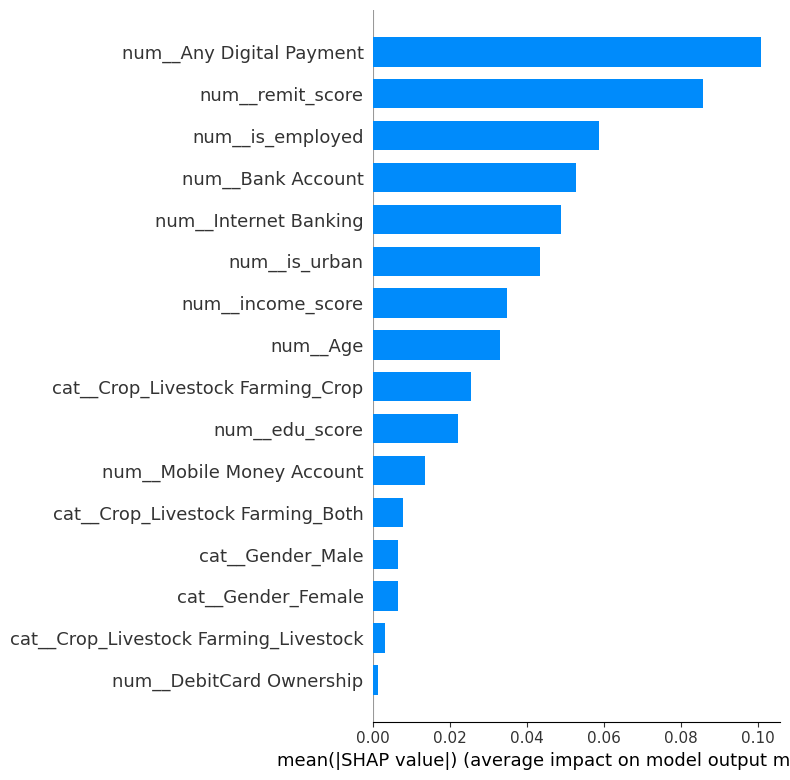

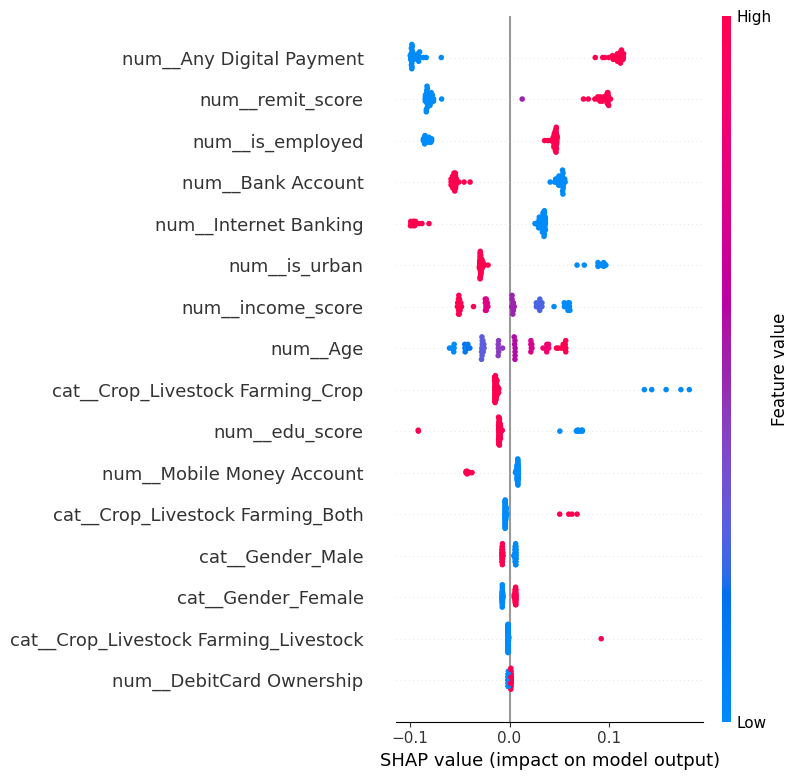

In [138]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Convert column names to numpy array for SHAP
feature_names = np.array(X_test_df.columns)

# Run SHAP explainer
explainer = shap.Explainer(log_reg_model.predict_proba, X_test_df)
shap_values = explainer(X_test_df)

# Plot bar chart
shap.summary_plot(shap_values.values[..., 1], X_test_df.values, feature_names=feature_names, plot_type="bar")

# Plot beeswarm
shap.summary_plot(shap_values.values[..., 1], X_test_df.values, feature_names=feature_names)
